<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Building%20Decision%20Trees%20with%20Python%3A%20A%20Step-by-Step%20Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What libraries and data (https://drive.google.com/file/d/1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc/view?usp=sharing) do you need to import to create a decision tree model?

2. How do you import raw data from a CSV file and store it in an object named "dataset" using the Pandas library in Python?

3. Create a function that performs data preprocessing according to the following steps: replace missing values in the 'Age' column with the mean of that column, replace 'male' values with 1 and 'female' values with 0 in the 'Sex' column, replace missing values in the 'Cabin' column with 'G6', and replace 'Yes' values with 1 and 'No' values with 0 in the 'Survived' column.

4. How do you separate the data into inputs and outputs, as well as training and testing data?

5. What are the steps to follow for building, adjusting, and evaluating a decision tree classification model?

6. How do you visualize the decision tree?

7. Now, repeat the same steps but this time, apply pruning to address the problem of overfitting.






**0. Decision Tree**

[Télécharger la trame de données de l'atelier Decision tree](https://drive.google.com/file/d/1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc/view?usp=sharing)

**1. Importer les bibliothèques nécessaires pour faire un modèle d'arbre de décision ?**

In [2]:
#1.Importation des bibliothèques 
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**2. Comment importer les données brutes à partir d'un fichier CSV et stocker les données dans un objet nommé "dataset" en utilisant la bibliothèque Pandas en Python ?**

In [3]:
#2. Importer les données brutes
dataset=pd.read_csv("/content/titanic-passengers (3).csv", sep=";")


**3. Faire une fonction qui effectue le prétraitement des données selon les étapes suivantes : remplacer les valeurs manquantes de la colonne 'Age' par la moyenne de cette colonne, remplacer les valeurs 'male' par 1 et 'female' par 0 dans la colonne 'Sex', remplacer les valeurs manquantes de la colonne 'Cabin' par 'G6', et remplacer les valeurs 'Yes' par 1 et 'No' par 0 dans la colonne 'Survived'?**




In [4]:
#3. Prétraitement des données
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data

data = preprocess_data(dataset)

**4. Séparer les données en Inputs et Output et données d'entrainement et données de test ?**

In [6]:
#4. Extraction des caractéristiques et cible (x,y split)
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#5. Train Test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

**5. Quelles sont les étapes à suivre pour construire, ajuster et évaluer un modèle de classification d'arbre de décision ?**

In [7]:
#6. Construction du modèle
clf = DecisionTreeClassifier()  

#7. Ajustement du modèle
model = clf.fit(x_train, y_train)

#8. Evaluation du modèle
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


**6. Visualiser l'arbre de décision !**

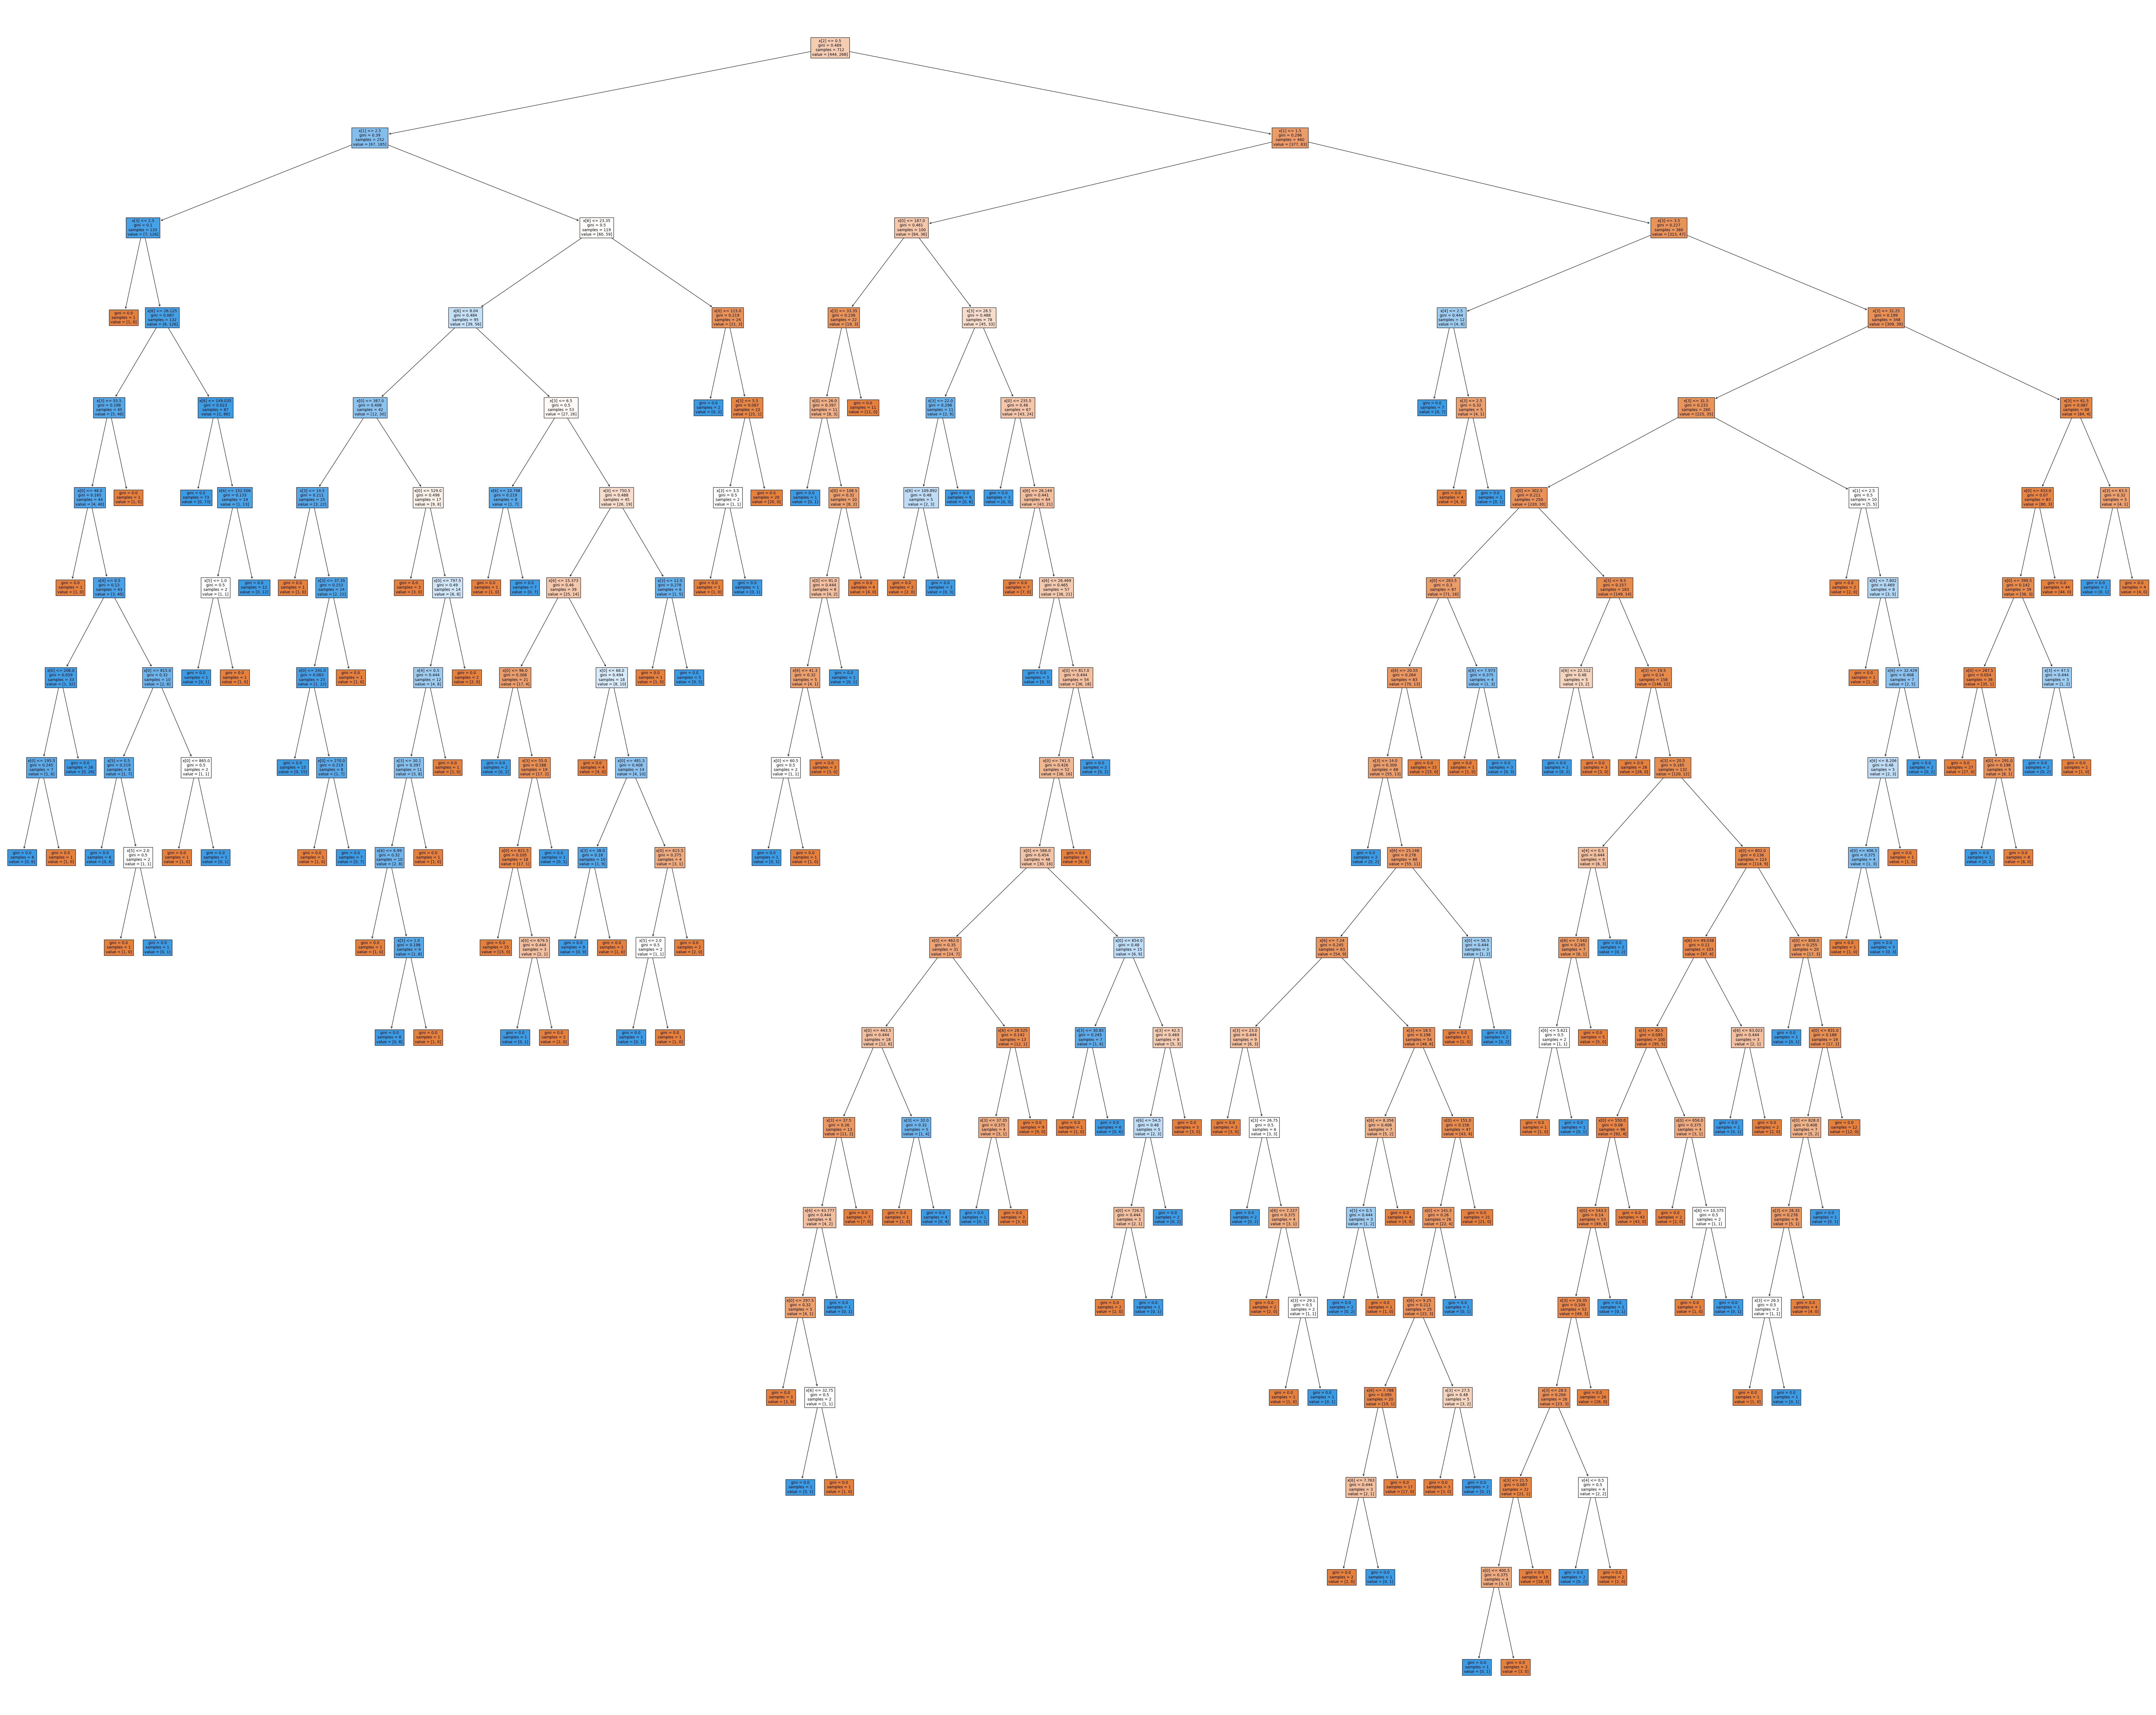

In [8]:
#9. Visualisation de l'arbre
import sklearn
import tree
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(100,80))
_ = sklearn.tree.plot_tree(model, filled=True)

**7. Maintenant refaire les mêmes étapes mais cette fois-ci en appliquant le Pruning pour pallier le problème de l'Overfitting.**

score:0.8156424581005587


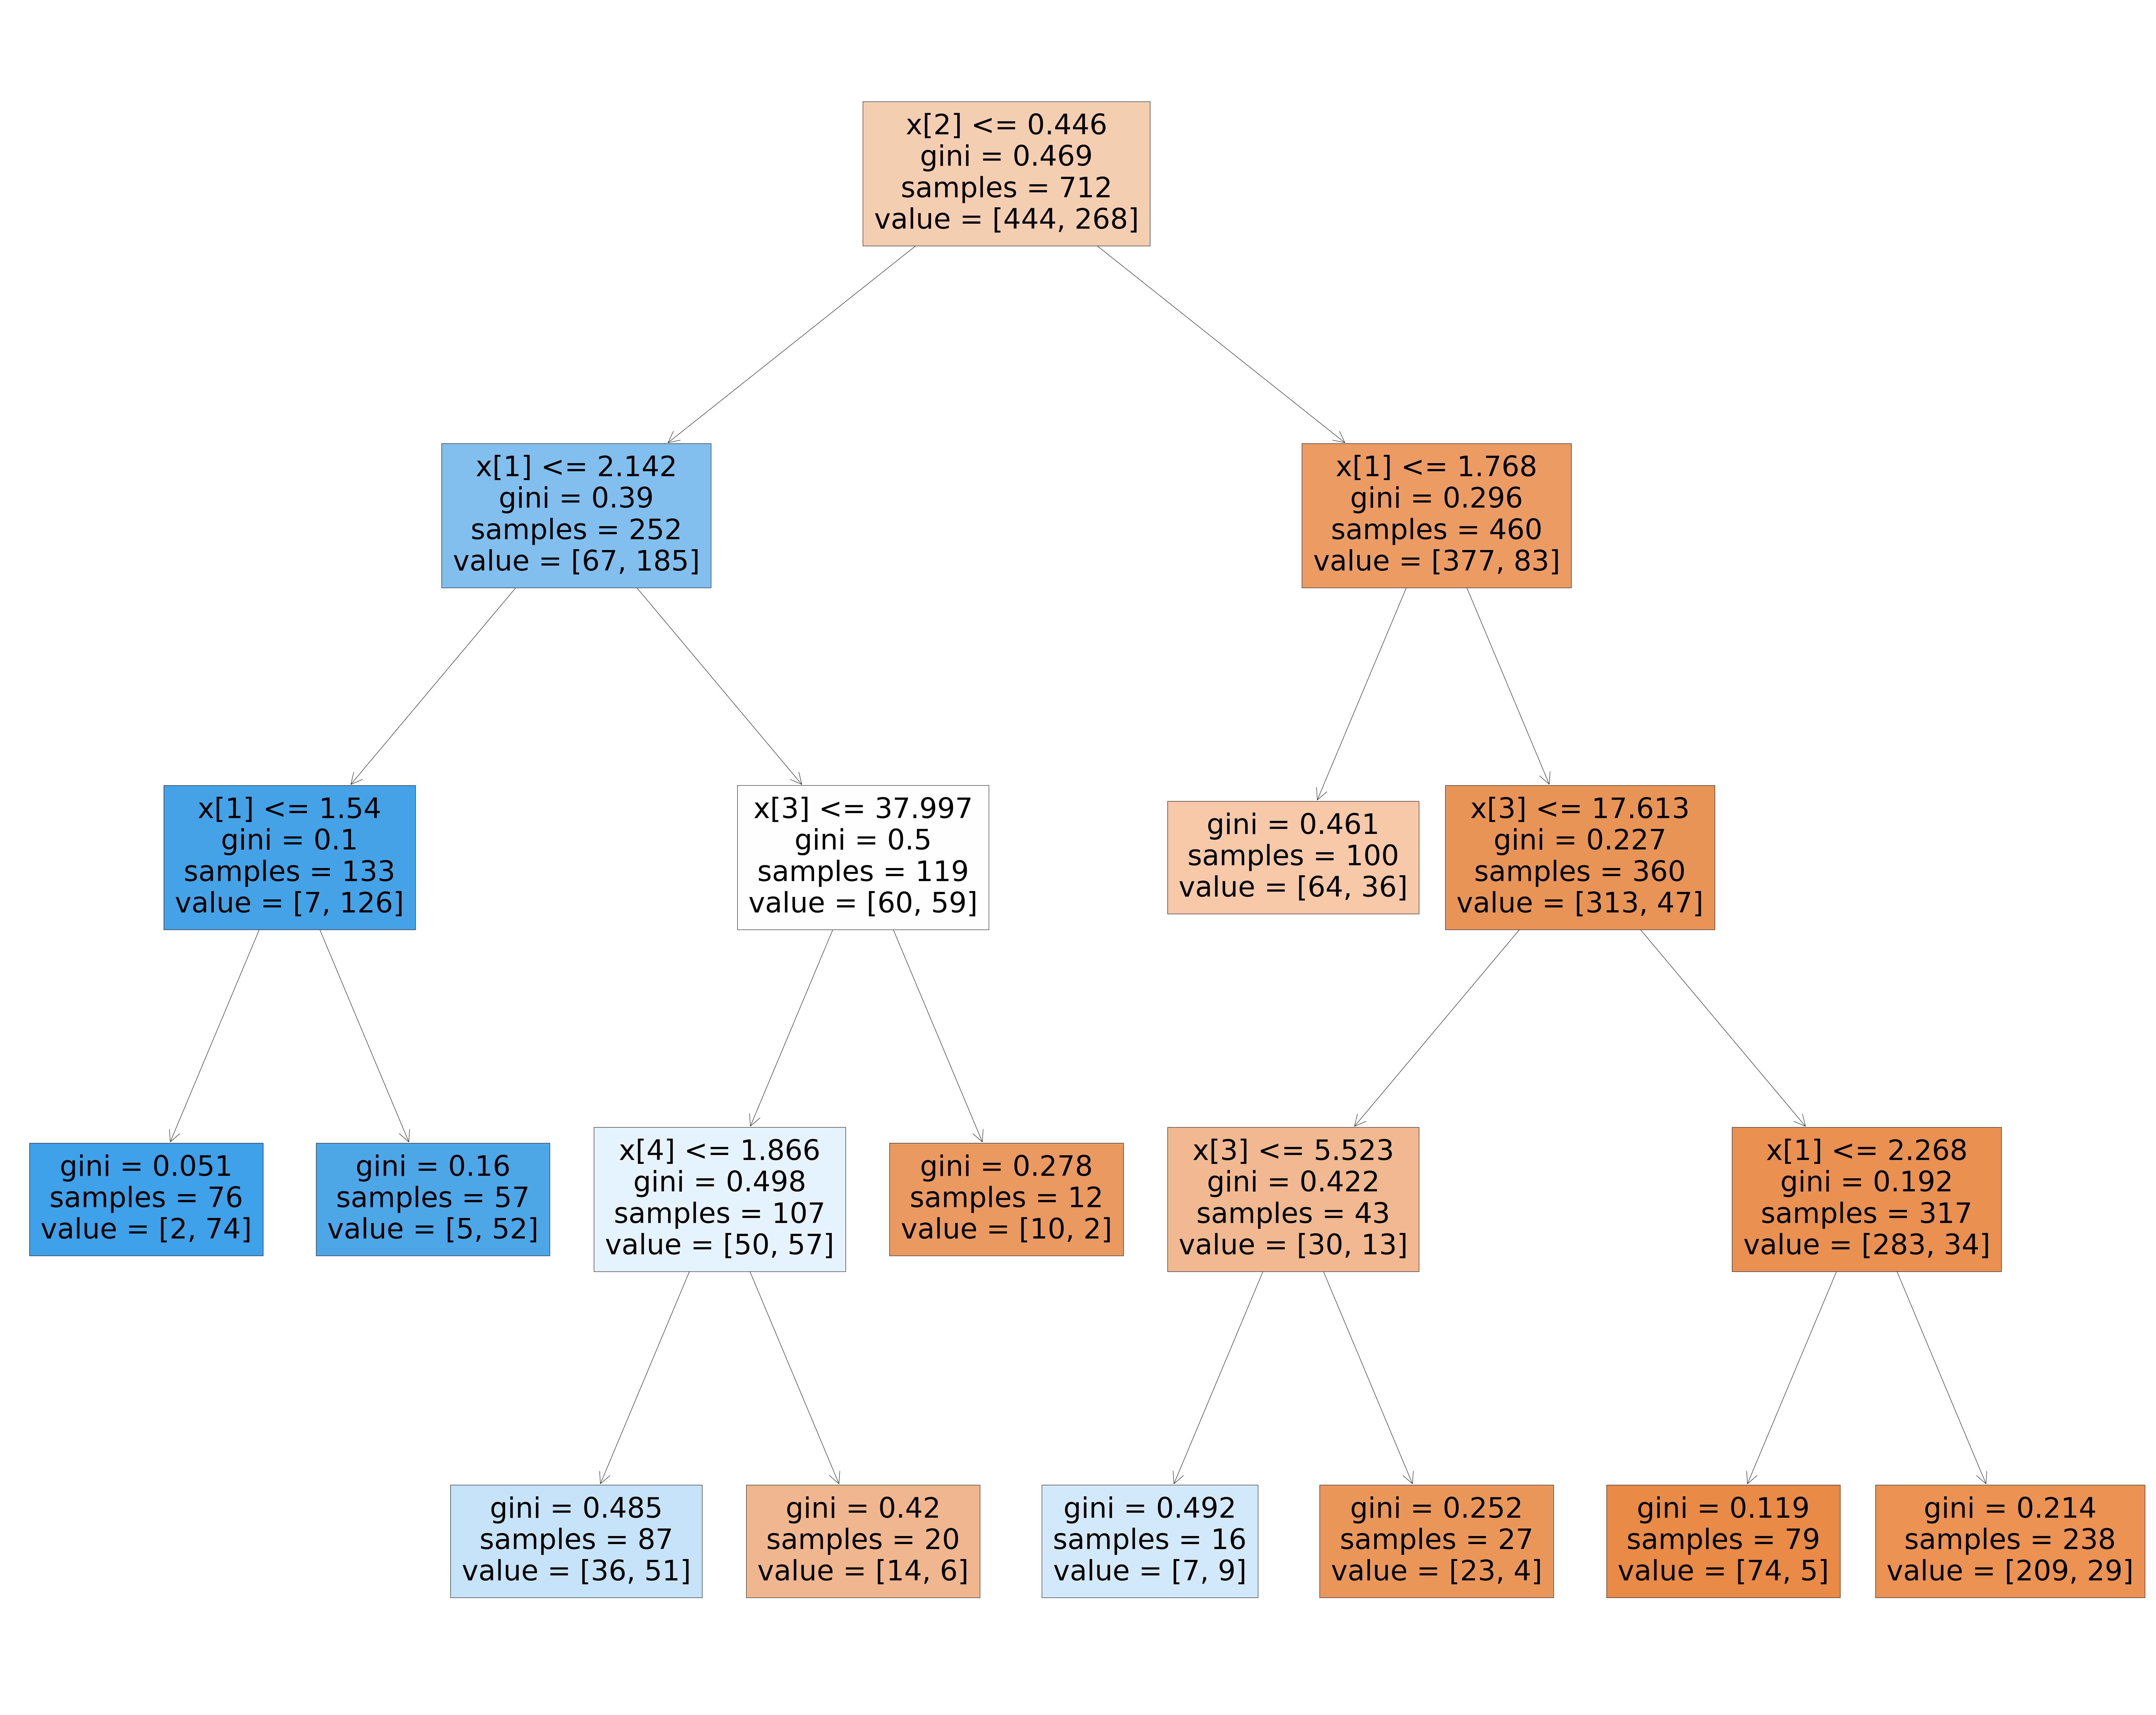

In [9]:
#4. Extraction des caractéristiques et cible (x,y split)
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#5. Train Test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#6. Construction du modèle
# Tailler l'arbre de décision(Pruning)
model_p = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf =5, max_depth = 4 ) 

#7. Ajustement du modèle
model = model_p.fit(x_train, y_train)

#8. Evaluation du modèle
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

#9. Visualisation de l'arbre
import sklearn
import graphviz
import tree
from sklearn.tree import export_graphviz
fig = plt.figure(figsize=(100,80))
_ = sklearn.tree.plot_tree(model, filled=True)